In [1]:
#Importing packages
import numpy as np
import pandas as pd
import seaborn as sb
#import category_encoders as ce
import matplotlib.pyplot as plt
import pylab as pl
from pandas import ExcelFile
import xlrd
from sklearn import preprocessing

%matplotlib inline

In [2]:
#Openning Excel sheet and importing the data
"""
Open files and create the data frame from the excel sheet.
there are 24 columns and 142193 observations.
"""
#Assign spreadsheet file name to 'file'.
file = 'WeatherAUS-Final-PCA - Important.xlsx'

#Load spreadsheet.
Excel_File = pd.ExcelFile (file)
print "The file name is :", file
print "The sheet's name is:", "Data"

#Load a sheet into a dataframe by name Data:
Data = Excel_File.parse('Data')
print "The matrix size is:", np.shape (Data)
print "The file has:", np.size (Data), "data points."
print "*******************************************"

#Data
X = Data.drop('label', axis=1)  
y = Data['label']
#print X.head()
#print y.head()

The file name is : WeatherAUS-Final-PCA - Important.xlsx
The sheet's name is: Data
The matrix size is: (142193, 9)
The file has: 1279737 data points.
*******************************************


In [3]:
#Divide data into training and test sets
from sklearn.model_selection import train_test_split

#P stands for Primary sets 
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X, y, test_size = 0.20, random_state = 1) 

X_train = X_train_p
X_test = X_test_p
y_train = y_train_p
y_test = y_test_p 

X_train = pd.DataFrame(X_train)
#Adding name for the columns
X_train.columns =  ['P1', 'P2','P3','P4','P5','P6','P7','P8']

X_train = X_train.reset_index()
X_train = X_train.drop('index', axis=1)                            
print X_train.shape
#print "Training data"
#print X_train.head()

X_test = pd.DataFrame(X_test)
X_test.columns =  ['P1', 'P2','P3','P4','P5','P6','P7','P8']

X_test = X_test.reset_index()
X_test = X_test.drop('index', axis=1)                            
print X_test.shape
#print "Test data"
#print X_test.head()

(113754, 8)
(28439, 8)


In [4]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from imblearn.metrics import geometric_mean_score
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

%matplotlib inline

('Accuracy:', 0.8410984915081402)
('Precision:', 0.71886559802712702)
('Recall:', 0.46313949793454084)
('F-Measure:', 0.56333945308725486)
('Geometric mean:', 0.66279528593987769)
*******************************************
                   pre       rec       spe        f1       geo       iba       sup

    class 0       0.86      0.95      0.46      0.90      0.79      0.63     22145
    class 1       0.72      0.46      0.95      0.56      0.79      0.61      6294

avg / total       0.83      0.84      0.57      0.83      0.79      0.62     28439

*******************************************


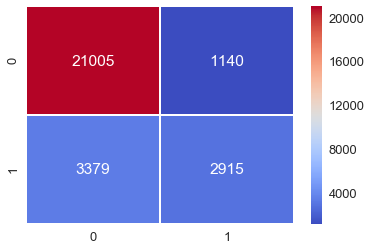

In [5]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)

# Model Accuracy: how often is the classifier correct?
lr_test_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
lr_test_precision = metrics.precision_score(y_test, y_pred)
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
lr_test_recall = metrics.recall_score(y_test, y_pred)
print("Recall:",metrics.recall_score(y_test, y_pred))

#Model F-measure:Compute the F1 score, also known as balanced F-score or F-measure
F1 = 2 * (metrics.precision_score(y_test, y_pred) * metrics.recall_score
          (y_test, y_pred)) / (metrics.precision_score(y_test, y_pred) + metrics.recall_score(y_test, y_pred))
lr_f1 = F1                                      
print ('F-Measure:', F1)

#Model G-mean
lr_Gmean =  geometric_mean_score(y_test, y_pred)
print ('Geometric mean:', geometric_mean_score(y_test, y_pred))
print "*******************************************"

#Evaluating the results
target_names = ['class 0', 'class 1']
print(classification_report_imbalanced(y_test, y_pred,     target_names=target_names))
print "*******************************************"

#Confusion matrix using pyplot 
cm_lr = confusion_matrix(y_test, y_pred)
sb.set(style="whitegrid",font='sans-serif', font_scale=1.3)
ax= plt.subplot()
sb.heatmap(cm_lr, annot=True, ax = ax, cmap='coolwarm',fmt='g',linewidths=0.5 ) #annot=True to annotate cells

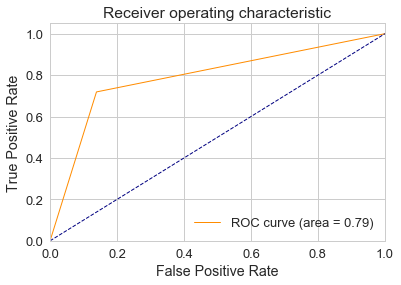

In [6]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

('Accuracy:', 0.83934034248742928)
('Precision:', 0.73329726805517992)
('Recall:', 0.43072767715284399)
('F-Measure:', 0.54268841957761993)
('Geometric mean:', 0.64152135308259062)
*******************************************
                   pre       rec       spe        f1       geo       iba       sup

    class 0       0.86      0.96      0.43      0.90      0.79      0.63     22145
    class 1       0.73      0.43      0.96      0.54      0.79      0.62      6294

avg / total       0.83      0.84      0.55      0.82      0.79      0.63     28439

*******************************************


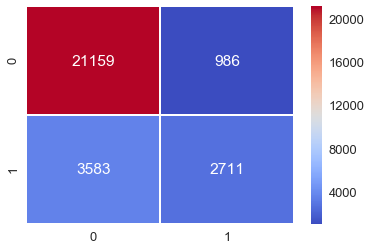

In [7]:
# Support Vector Machines -linear

svc = SVC(kernel='linear', C= 10 )
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

acc_svc_linear = round(svc.score(X_train, y_train) * 100, 2)

# Model Accuracy: how often is the classifier correct?
SVM_Linear_test_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
SVM_Linear_test_precision = metrics.precision_score(y_test, y_pred)
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
SVM_Linear_test_recall = metrics.recall_score(y_test, y_pred)
print("Recall:",metrics.recall_score(y_test, y_pred))

#Model F-measure:Compute the F1 score, also known as balanced F-score or F-measure
F1 = 2 * (metrics.precision_score(y_test, y_pred) * metrics.recall_score
          (y_test, y_pred)) / (metrics.precision_score(y_test, y_pred) + metrics.recall_score(y_test, y_pred))
SVM_Linear_test_f1 = F1
print ('F-Measure:', F1)

#Model G-mean
SVM_Linear_test_Gmean  = geometric_mean_score(y_test, y_pred)
print ('Geometric mean:', geometric_mean_score(y_test, y_pred))
print "*******************************************"
#Evaluating the results
"""Confusion matrix, precision, recall, and F1 measures 
are the most commonly used metrics for classification tasks"""

target_names = ['class 0', 'class 1']
print(classification_report_imbalanced(y_test, y_pred,     target_names=target_names))
print "*******************************************"

#Confusion matrix using pyplot 
cm_SVC_linear = confusion_matrix(y_test, y_pred)
sb.set(style="whitegrid",font='sans-serif', font_scale=1.3)
ax= plt.subplot()
sb.heatmap(cm_SVC_linear, annot=True, ax = ax, cmap='coolwarm',fmt='g',linewidths=0.5 ) #annot=True to annotate cells

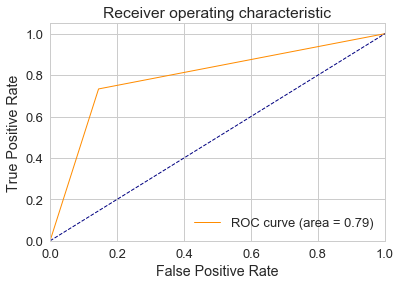

In [8]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

('Accuracy:', 0.84915081402299664)
('Precision:', 0.77817878956135478)
('Recall:', 0.44534477279949158)
('F-Measure:', 0.56649151172190781)
('Geometric mean:', 0.65519200580405379)
*******************************************
                   pre       rec       spe        f1       geo       iba       sup

    class 0       0.86      0.96      0.45      0.91      0.82      0.67     22145
    class 1       0.78      0.45      0.96      0.57      0.82      0.66      6294

avg / total       0.84      0.85      0.56      0.83      0.82      0.67     28439

*******************************************


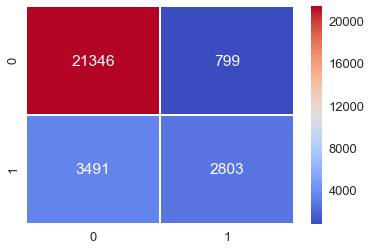

In [9]:
# Support Vector Machines -linear

svc = SVC(kernel='rbf', C= 10, gamma = 0.1)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

acc_svc_RBF = round(svc.score(X_train, y_train) * 100, 2)

# Model Accuracy: how often is the classifier correct?
SVM_RBF_test_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
SVM_RBF_test_precision = metrics.precision_score(y_test, y_pred)
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
SVM_RBF_test_recall = metrics.recall_score(y_test, y_pred)
print("Recall:",metrics.recall_score(y_test, y_pred))

#Model F-measure:Compute the F1 score, also known as balanced F-score or F-measure
F1 = 2 * (metrics.precision_score(y_test, y_pred) * metrics.recall_score
          (y_test, y_pred)) / (metrics.precision_score(y_test, y_pred) + metrics.recall_score(y_test, y_pred))
SVM_RBF_test_f1 = F1
print ('F-Measure:', F1)

#Model G-mean
SVM_RBF_test_Gmean = geometric_mean_score(y_test, y_pred)
print ('Geometric mean:', geometric_mean_score(y_test, y_pred))
print "*******************************************"
#Evaluating the results
"""Confusion matrix, precision, recall, and F1 measures  
are the most commonly used metrics for classification tasks"""

target_names = ['class 0', 'class 1']
print(classification_report_imbalanced(y_test, y_pred,     target_names=target_names))
print "*******************************************"

#Confusion matrix using pyplot 
cm_SVC_RBF = confusion_matrix(y_test, y_pred)
sb.set(style="whitegrid",font='sans-serif', font_scale=1.3)
ax= plt.subplot()
sb.heatmap(cm_SVC_RBF, annot=True, ax = ax, cmap='coolwarm',fmt='g',linewidths=0.5 ) #annot=True to annotate cells

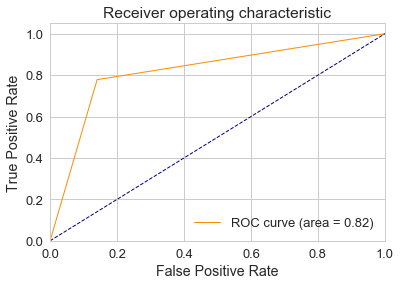

In [10]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

('Accuracy:', 0.80382573226906717)
('Precision:', 0.83505154639175261)
('Recall:', 0.1415633937082936)
('F-Measure:', 0.24208667300638498)
('Geometric mean:', 0.37475098657137107)
*******************************************
                   pre       rec       spe        f1       geo       iba       sup

    class 0       0.80      0.99      0.14      0.89      0.82      0.67     22145
    class 1       0.84      0.14      0.99      0.24      0.82      0.67      6294

avg / total       0.81      0.80      0.33      0.74      0.82      0.67     28439

*******************************************


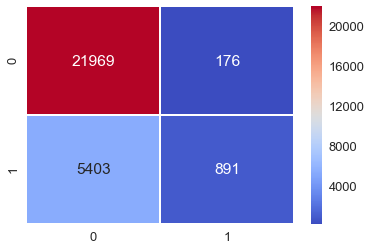

In [11]:
# Support Vector Machines -linear

svc = SVC(kernel='poly', degree=2,  C= 10 )
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

acc_svc_Poly = round(svc.score(X_train, y_train) * 100, 2)

# Model Accuracy: how often is the classifier correct?
SVM_Poly_test_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
SVM_Poly_test_precision = metrics.precision_score(y_test, y_pred)
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
SVM_Poly_test_recall = metrics.recall_score(y_test, y_pred)
print("Recall:",metrics.recall_score(y_test, y_pred))

#Model F-measure:Compute the F1 score, also known as balanced F-score or F-measure
F1 = 2 * (metrics.precision_score(y_test, y_pred) * metrics.recall_score
          (y_test, y_pred)) / (metrics.precision_score(y_test, y_pred) + metrics.recall_score(y_test, y_pred))
SVM_Poly_test_f1 = F1
print ('F-Measure:', F1)

#Model G-mean
SVM_Poly_test_Gmean = geometric_mean_score(y_test, y_pred)
print ('Geometric mean:', geometric_mean_score(y_test, y_pred))
print "*******************************************"
#Evaluating the results
"""Confusion matrix, precision, recall, and F1 measures 
are the most commonly used metrics for classification tasks"""

target_names = ['class 0', 'class 1']
print(classification_report_imbalanced(y_test, y_pred,     target_names=target_names))
print "*******************************************"

#Confusion matrix using pyplot 
cm_SVC_Poly = confusion_matrix(y_test, y_pred)
sb.set(style="whitegrid",font='sans-serif', font_scale=1.3)
ax= plt.subplot()
sb.heatmap(cm_SVC_Poly, annot=True, ax = ax, cmap='coolwarm',fmt='g',linewidths=0.5 ) #annot=True to annotate cells

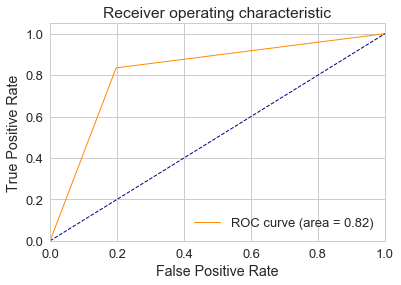

In [12]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

('Accuracy:', 0.82225113400611838)
('Precision:', 0.62111436950146626)
('Recall:', 0.50476644423260253)
('F-Measure:', 0.55692874046805163)
('Geometric mean:', 0.67866947576238923)
*******************************************
                   pre       rec       spe        f1       geo       iba       sup

    class 0       0.87      0.91      0.50      0.89      0.73      0.55     22145
    class 1       0.62      0.50      0.91      0.56      0.73      0.52      6294

avg / total       0.81      0.82      0.60      0.82      0.73      0.55     28439

*******************************************


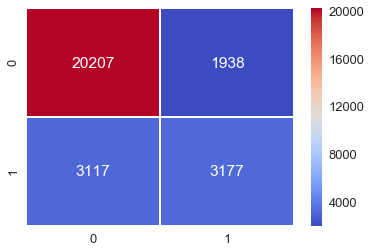

In [13]:
#KNN

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_train, y_train) * 100, 2)

# Model Accuracy: how often is the classifier correct?
knn_test_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
knn_test_precision = metrics.precision_score(y_test, y_pred)
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
knn_test_recall = metrics.recall_score(y_test, y_pred)
print("Recall:",metrics.recall_score(y_test, y_pred))

#Model F-measure:Compute the F1 score, also known as balanced F-score or F-measure
F1 = 2 * (metrics.precision_score(y_test, y_pred) * metrics.recall_score
          (y_test, y_pred)) / (metrics.precision_score(y_test, y_pred) + metrics.recall_score(y_test, y_pred))
knn_test_f1 = F1
print ('F-Measure:', F1)

#Model G-mean
knn_test_Gmean =  geometric_mean_score(y_test, y_pred)
print ('Geometric mean:', geometric_mean_score(y_test, y_pred))
print "*******************************************"
#Evaluating the results
"""Confusion matrix, precision, recall, and F1 measures 
are the most commonly used metrics for classification tasks"""

target_names = ['class 0', 'class 1']
print(classification_report_imbalanced(y_test, y_pred,     target_names=target_names))
print "*******************************************"

#Confusion matrix using pyplot 
cm_KNN = confusion_matrix(y_test, y_pred)
sb.set(style="whitegrid",font='sans-serif', font_scale=1.3)
ax= plt.subplot()
sb.heatmap(cm_KNN, annot=True, ax = ax, cmap='coolwarm',fmt='g',linewidths=0.5 ) #annot=True to annotate cells

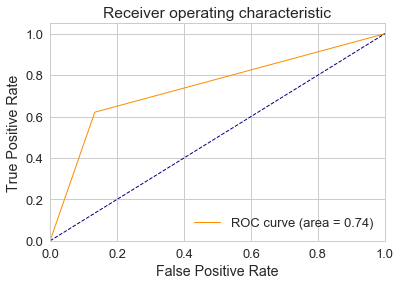

In [14]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

('Accuracy:', 0.82569710608671187)
('Precision:', 0.66741798146756826)
('Recall:', 0.42341912932952019)
('F-Measure:', 0.51812967823466516)
('Geometric mean:', 0.63089410029137383)
*******************************************
                   pre       rec       spe        f1       geo       iba       sup

    class 0       0.85      0.94      0.42      0.89      0.75      0.58     22145
    class 1       0.67      0.42      0.94      0.52      0.75      0.56      6294

avg / total       0.81      0.83      0.54      0.81      0.75      0.57     28439

*******************************************


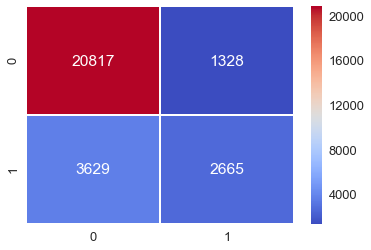

In [15]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)

acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

# Model Accuracy: how often is the classifier correct?
GaussianNB_test_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
GaussianNB_test_precision = metrics.precision_score(y_test, y_pred)
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
GaussianNB_test_recall = metrics.recall_score(y_test, y_pred)
print("Recall:",metrics.recall_score(y_test, y_pred))

#Model F-measure:Compute the F1 score, also known as balanced F-score or F-measure
F1 = 2 * (metrics.precision_score(y_test, y_pred) * metrics.recall_score
          (y_test, y_pred)) / (metrics.precision_score(y_test, y_pred) + metrics.recall_score(y_test, y_pred))
GaussianNB_test_f1 = F1
print ('F-Measure:', F1)

#Model G-mean
GaussianNB_test_Gmean = geometric_mean_score(y_test, y_pred) 
print ('Geometric mean:', geometric_mean_score(y_test, y_pred))
print "*******************************************"
#Evaluating the results
"""Confusion matrix, precision, recall, and F1 measures 
are the most commonly used metrics for classification tasks"""

target_names = ['class 0', 'class 1']
print(classification_report_imbalanced(y_test, y_pred,     target_names=target_names))
print "*******************************************"

#Confusion matrix using pyplot 
cm_GaussianNB = confusion_matrix(y_test, y_pred)
sb.set(style="whitegrid",font='sans-serif', font_scale=1.3)
ax= plt.subplot()
sb.heatmap(cm_GaussianNB, annot=True, ax = ax, cmap='coolwarm',fmt='g',linewidths=0.5 ) #annot=True to annotate cells

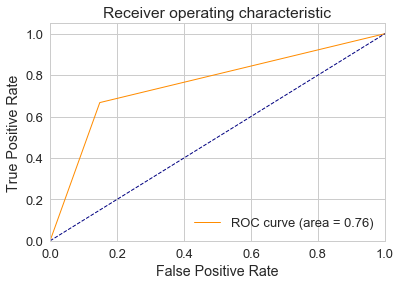

In [16]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

C:\Users\Mantre\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


('Accuracy:', 0.79208129681071771)
('Precision:', 0.54416879202411317)
('Recall:', 0.37289482046393391)
('F-Measure:', 0.44253794663901197)
('Geometric mean:', 0.58291489573249)
*******************************************
                   pre       rec       spe        f1       geo       iba       sup

    class 0       0.84      0.91      0.37      0.87      0.67      0.47     22145
    class 1       0.54      0.37      0.91      0.44      0.67      0.44      6294

avg / total       0.77      0.79      0.49      0.78      0.67      0.46     28439

*******************************************


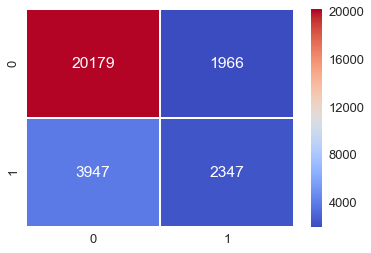

In [17]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)

# Model Accuracy: how often is the classifier correct?
P_test_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
P_test_precision = metrics.precision_score(y_test, y_pred)
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
P_test_recall = metrics.recall_score(y_test, y_pred)
print("Recall:",metrics.recall_score(y_test, y_pred))

#Model F-measure:Compute the F1 score, also known as balanced F-score or F-measure
F1 = 2 * (metrics.precision_score(y_test, y_pred) * metrics.recall_score
          (y_test, y_pred)) / (metrics.precision_score(y_test, y_pred) + metrics.recall_score(y_test, y_pred))
P_test_f1 = F1
print ('F-Measure:', F1)

#Model G-mean
P_test_Gmean =  geometric_mean_score(y_test, y_pred)
print ('Geometric mean:', geometric_mean_score(y_test, y_pred))
print "*******************************************"
#Evaluating the results
"""Confusion matrix, precision, recall, and F1 measures 
are the most commonly used metrics for classification tasks"""

target_names = ['class 0', 'class 1']
print(classification_report_imbalanced(y_test, y_pred,     target_names=target_names))
print "*******************************************"

#Confusion matrix using pyplot 
cm_Perceptron = confusion_matrix(y_test, y_pred)
sb.set(style="whitegrid",font='sans-serif', font_scale=1.3)
ax= plt.subplot()
sb.heatmap(cm_Perceptron, annot=True, ax = ax, cmap='coolwarm',fmt='g',linewidths=0.5 ) #annot=True to annotate cells

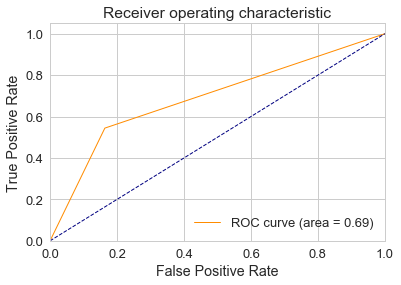

In [18]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

C:\Users\Mantre\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


('Accuracy:', 0.83624600021097784)
('Precision:', 0.69336168202220649)
('Recall:', 0.46631712742294251)
('F-Measure:', 0.55761375510591804)
('Geometric mean:', 0.66255910177886401)
*******************************************
                   pre       rec       spe        f1       geo       iba       sup

    class 0       0.86      0.94      0.47      0.90      0.77      0.61     22145
    class 1       0.69      0.47      0.94      0.56      0.77      0.59      6294

avg / total       0.82      0.84      0.57      0.82      0.77      0.60     28439

*******************************************


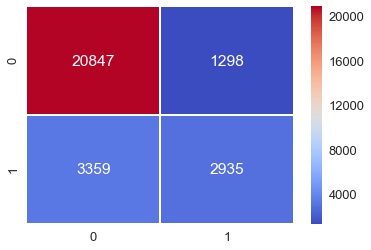

In [19]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)

acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)

# Model Accuracy: how often is the classifier correct?
SGT_test_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
SGT_test_precision = metrics.precision_score(y_test, y_pred)
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
SGT_test_recall = metrics.recall_score(y_test, y_pred)
print("Recall:",metrics.recall_score(y_test, y_pred))

#Model F-measure:Compute the F1 score, also known as balanced F-score or F-measure
F1 = 2 * (metrics.precision_score(y_test, y_pred) * metrics.recall_score
          (y_test, y_pred)) / (metrics.precision_score(y_test, y_pred) + metrics.recall_score(y_test, y_pred))
SGT_test_f1 = F1
print ('F-Measure:', F1)

#Model G-mean
SGT_test_Gmean = geometric_mean_score(y_test, y_pred)
print ('Geometric mean:', geometric_mean_score(y_test, y_pred))
print "*******************************************"
#Evaluating the results
"""Confusion matrix, precision, recall, and F1 measures 
are the most commonly used metrics for classification tasks"""

target_names = ['class 0', 'class 1']
print(classification_report_imbalanced(y_test, y_pred,     target_names=target_names))
print "*******************************************"

#Confusion matrix using pyplot 
cm_SGD = confusion_matrix(y_test, y_pred)
sb.set(style="whitegrid",font='sans-serif', font_scale=1.3)
ax= plt.subplot()
sb.heatmap(cm_SGD, annot=True, ax = ax, cmap='coolwarm',fmt='g',linewidths=0.5 ) #annot=True to annotate cells

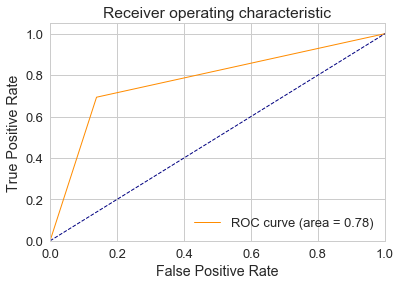

In [20]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

('Accuracy:', 0.77003410809100181)
('Precision:', 0.4813410194174757)
('Recall:', 0.50413091833492218)
('F-Measure:', 0.49247245072171342)
('Geometric mean:', 0.65291453067300753)
*******************************************
                   pre       rec       spe        f1       geo       iba       sup

    class 0       0.86      0.85      0.50      0.85      0.64      0.43     22145
    class 1       0.48      0.50      0.85      0.49      0.64      0.40      6294

avg / total       0.77      0.77      0.58      0.77      0.64      0.42     28439

*******************************************


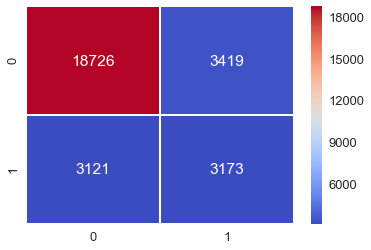

In [21]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

# Model Accuracy: how often is the classifier correct?
dt_test_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
dt_test_precision = metrics.precision_score(y_test, y_pred)
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
dt_test_recall = metrics.recall_score(y_test, y_pred)
print("Recall:",metrics.recall_score(y_test, y_pred))

#Model F-measure:Compute the F1 score, also known as balanced F-score or F-measure
F1 = 2 * (metrics.precision_score(y_test, y_pred) * metrics.recall_score
          (y_test, y_pred)) / (metrics.precision_score(y_test, y_pred) + metrics.recall_score(y_test, y_pred))
dt_test_f1 = F1
print ('F-Measure:', F1)

#Model G-mean
dt_test_Gmean = geometric_mean_score(y_test, y_pred)
print ('Geometric mean:', geometric_mean_score(y_test, y_pred))
print "*******************************************"
#Evaluating the results
"""Confusion matrix, precision, recall, and F1 measures 
are the most commonly used metrics for classification tasks"""

target_names = ['class 0', 'class 1']
print(classification_report_imbalanced(y_test, y_pred,     target_names=target_names))
print "*******************************************"

#Confusion matrix using pyplot 
cm_DT = confusion_matrix(y_test, y_pred)
sb.set(style="whitegrid",font='sans-serif', font_scale=1.3)
ax= plt.subplot()
sb.heatmap(cm_DT, annot=True, ax = ax, cmap='coolwarm',fmt='g',linewidths=0.5 ) #annot=True to annotate cells

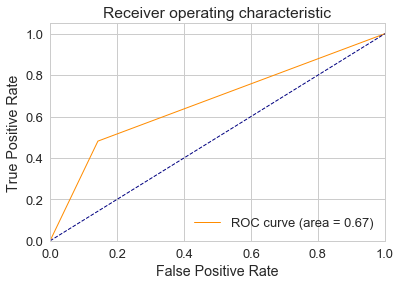

In [22]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

('Accuracy:', 0.84672456837441545)
('Precision:', 0.72695285010555943)
('Recall:', 0.49237368922783603)
('F-Measure:', 0.5870986075589657)
('Geometric mean:', 0.68300308985988478)
*******************************************
                   pre       rec       spe        f1       geo       iba       sup

    class 0       0.87      0.95      0.49      0.91      0.79      0.64     22145
    class 1       0.73      0.49      0.95      0.59      0.79      0.62      6294

avg / total       0.84      0.85      0.59      0.84      0.79      0.64     28439

*******************************************


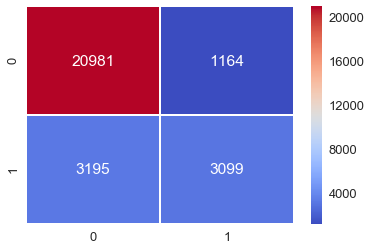

In [23]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

# Model Accuracy: how often is the classifier correct?
rf_test_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
rf_test_precision = metrics.precision_score(y_test, y_pred)
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
rf_test_recall = metrics.recall_score(y_test, y_pred)
print("Recall:",metrics.recall_score(y_test, y_pred))

#Model F-measure:Compute the F1 score, also known as balanced F-score or F-measure
F1 = 2 * (metrics.precision_score(y_test, y_pred) * metrics.recall_score
          (y_test, y_pred)) / (metrics.precision_score(y_test, y_pred) + metrics.recall_score(y_test, y_pred))
rf_test_f1 = F1
print ('F-Measure:', F1)

#Model G-mean
rf_test_Gmean = geometric_mean_score(y_test, y_pred)
print ('Geometric mean:', geometric_mean_score(y_test, y_pred))
print "*******************************************"
#Evaluating the results
"""Confusion matrix, precision, recall, and F1 measures 
are the most commonly used metrics for classification tasks"""

target_names = ['class 0', 'class 1']
print(classification_report_imbalanced(y_test, y_pred,     target_names=target_names))
print "*******************************************"

#Confusion matrix using pyplot 
cm_RT = confusion_matrix(y_test, y_pred)
sb.set(style="whitegrid",font='sans-serif', font_scale=1.3)
ax= plt.subplot()
sb.heatmap(cm_RT, annot=True, ax = ax, cmap='coolwarm',fmt='g',linewidths=0.5 ) #annot=True to annotate cells

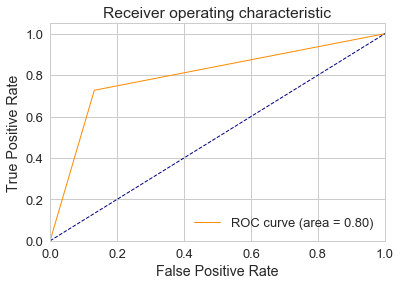

In [24]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

('Accuracy:', 0.82569710608671187)
('Precision:', 0.66741798146756826)
('Recall:', 0.42341912932952019)
('F-Measure:', 0.51812967823466516)
('Geometric mean:', 0.63089410029137383)
*******************************************
                   pre       rec       spe        f1       geo       iba       sup

    class 0       0.85      0.94      0.42      0.89      0.75      0.58     22145
    class 1       0.67      0.42      0.94      0.52      0.75      0.56      6294

avg / total       0.81      0.83      0.54      0.81      0.75      0.57     28439

*******************************************


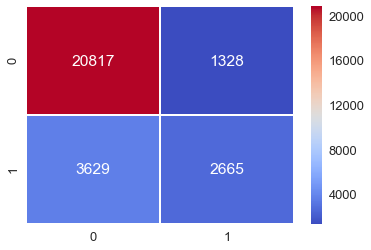

In [25]:
#Naive Bayes Classification

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
nb_model.score(X_train, y_train)

acc_nb_model = round(nb_model.score(X_train, y_train) * 100, 2)

# Model Accuracy: how often is the classifier correct?
nb_test_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
nb_test_precision = metrics.precision_score(y_test, y_pred)
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
nb_test_recall = metrics.recall_score(y_test, y_pred)
print("Recall:",metrics.recall_score(y_test, y_pred))

#Model F-measure:Compute the F1 score, also known as balanced F-score or F-measure
F1 = 2 * (metrics.precision_score(y_test, y_pred) * metrics.recall_score
          (y_test, y_pred)) / (metrics.precision_score(y_test, y_pred) + metrics.recall_score(y_test, y_pred))
nb_test_f1 = F1
print ('F-Measure:', F1)

#Model G-mean
nb_test_Gmean = geometric_mean_score(y_test, y_pred)
print ('Geometric mean:', geometric_mean_score(y_test, y_pred))
print "*******************************************"
#Evaluating the results
"""Confusion matrix, precision, recall, and F1 measures 
are the most commonly used metrics for classification tasks"""

target_names = ['class 0', 'class 1']
print(classification_report_imbalanced(y_test, y_pred,     target_names=target_names))
print "*******************************************"

#Confusion matrix using pyplot 
cm_NB = confusion_matrix(y_test, y_pred)
sb.set(style="whitegrid",font='sans-serif', font_scale=1.3)
ax= plt.subplot()
sb.heatmap(cm_NB, annot=True, ax = ax, cmap='coolwarm',fmt='g',linewidths=0.5 ) #annot=True to annotate cells

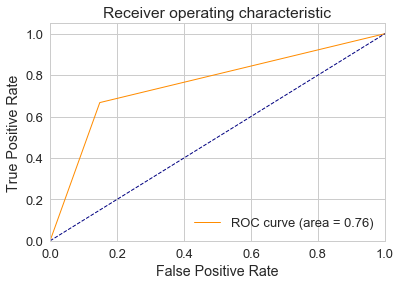

In [26]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

('Accuracy:', 0.83951615738950036)
('Precision:', 0.70458845789971614)
('Recall:', 0.47330791229742614)
('F-Measure:', 0.56624215928530697)
('Geometric mean:', 0.66829101133790703)
*******************************************
                   pre       rec       spe        f1       geo       iba       sup

    class 0       0.86      0.94      0.47      0.90      0.78      0.62     22145
    class 1       0.70      0.47      0.94      0.57      0.78      0.60      6294

avg / total       0.83      0.84      0.58      0.83      0.78      0.61     28439

*******************************************


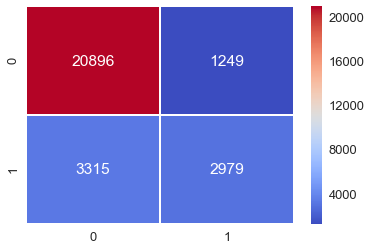

In [27]:
#Linear Discriminant Analysis

LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)
y_pred = LDA.predict(X_test)

acc_lda = round(LDA.score(X_train, y_train) * 100, 2)

# Model Accuracy: how often is the classifier correct?
lda_test_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
lda_test_precision = metrics.precision_score(y_test, y_pred)
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
lda_test_recall = metrics.recall_score(y_test, y_pred)
print("Recall:",metrics.recall_score(y_test, y_pred))

#Model F-measure:Compute the F1 score, also known as balanced F-score or F-measure
F1 = 2 * (metrics.precision_score(y_test, y_pred) * metrics.recall_score
          (y_test, y_pred)) / (metrics.precision_score(y_test, y_pred) + metrics.recall_score(y_test, y_pred))
lda_test_f1 = F1
print ('F-Measure:', F1)

#Model G-mean
lda_test_Gmean = geometric_mean_score(y_test, y_pred)
print ('Geometric mean:', geometric_mean_score(y_test, y_pred))
print "*******************************************"
#Evaluating the results
"""Confusion matrix, precision, recall, and F1 measures 
are the most commonly used metrics for classification tasks"""

target_names = ['class 0', 'class 1']
print(classification_report_imbalanced(y_test, y_pred,     target_names=target_names))
print "*******************************************"

#Confusion matrix using pyplot 
cm_LDA = confusion_matrix(y_test, y_pred)
sb.set(style="whitegrid",font='sans-serif', font_scale=1.3)
ax= plt.subplot()
sb.heatmap(cm_LDA, annot=True, ax = ax, cmap='coolwarm',fmt='g',linewidths=0.5 ) #annot=True to annotate cells

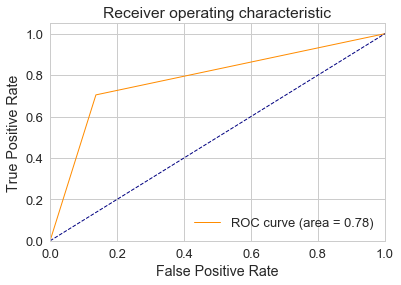

In [28]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [29]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines-Linear', 'Support Vector Machines_RBF',
              'Support Vector Machines_Poly', 'KNN', 'Gaussian Naive Bayes','Perceptron', 
              'Stochastic Gradient Decent', 'Decision Tree', 'Random Forest','Naive Bayes', 'Linear Discriminat Analysis'],

    #'Score': [lr_test_accuracy*100, SVM_Linear_test_accuracy*100, SVM_RBF_test_accuracy*100, SVM_Poly_test_accuracy*100,
     #            knn_test_accuracy*100, GaussianNB_test_accuracy*100, P_test_accuracy*100, SGT_test_accuracy*100, 
      #           dt_test_accuracy*100, rf_test_accuracy*100, nb_test_accuracy*100],
    
    'Accuracy': [lr_test_accuracy*100, SVM_Linear_test_accuracy*100, SVM_RBF_test_accuracy*100, SVM_Poly_test_accuracy*100,
                 knn_test_accuracy*100, GaussianNB_test_accuracy*100, P_test_accuracy*100, SGT_test_accuracy*100, 
                 dt_test_accuracy*100, rf_test_accuracy*100, nb_test_accuracy*100, lda_test_accuracy*100],
    
    'Precision': [lr_test_precision*100, SVM_Linear_test_precision*100, SVM_RBF_test_precision*100, SVM_Poly_test_accuracy*100,
                 knn_test_precision*100, GaussianNB_test_precision*100, P_test_precision*100, SGT_test_precision*100, 
                 dt_test_precision*100, rf_test_precision*100, nb_test_precision*100, lda_test_precision*100],
    
    'Recall': [lr_test_recall*100, SVM_Linear_test_recall*100, SVM_RBF_test_recall*100, SVM_Poly_test_recall*100,
                 knn_test_recall*100, GaussianNB_test_recall*100, P_test_f1*100, SGT_test_recall*100, 
                 dt_test_recall*100, rf_test_recall*100, nb_test_recall*100, lda_test_recall*100],

    'F_measure': [lr_f1*100, SVM_Linear_test_f1*100, SVM_RBF_test_f1*100,SVM_Poly_test_f1*100,
                   knn_test_f1*100, GaussianNB_test_f1*100, P_test_accuracy*100, SGT_test_f1*100, 
                   dt_test_f1*100, rf_test_f1*100, nb_test_f1*100, lda_test_f1*100],
    
    'G-mean': [lr_Gmean*100, SVM_Linear_test_Gmean*100, SVM_RBF_test_Gmean*100, SVM_Poly_test_Gmean*100,
                 knn_test_Gmean*100, GaussianNB_test_Gmean*100, P_test_Gmean*100, SGT_test_Gmean*100, 
                 dt_test_Gmean*100, rf_test_Gmean*100, nb_test_Gmean*100, lda_test_Gmean*100]})

models.sort_values(by='Accuracy', ascending=True).set_index('Model')

,Accuracy,F_measure,G-mean,Precision,Recall
Model,,,,,
Decision Tree,77.003411,49.247245,65.291453,48.134102,50.413092
Perceptron,79.208130,79.208130,58.291490,54.416879,44.253795
Support Vector Machines_Poly,80.382573,24.208667,37.475099,80.382573,14.156339
KNN,82.225113,55.692874,67.866948,62.111437,50.476644
Gaussian Naive Bayes,82.569711,51.812968,63.089410,66.741798,42.341913
Naive Bayes,82.569711,51.812968,63.089410,66.741798,42.341913
Stochastic Gradient Decent,83.624600,55.761376,66.255910,69.336168,46.631713
Support Vector Machines-Linear,83.934034,54.268842,64.152135,73.329727,43.072768
Linear Discriminat Analysis,83.951616,56.624216,66.829101,70.458846,47.330791


In [31]:
import plotly 
plotly.tools.set_credentials_file(username='elaheh.jafarigol', api_key='H7Q5lxLC8c1RIKLcRn5T')

In [30]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.plotly import iplot

#plotly.offline.init_notebook_mode()
#py.iplot(fig, filename="file.html")


"""#import plotly.graph_objs as go
import plotly.offline as py
py.iplot(fig)

from plotly.plotly import iplot
plotly.offline.init_notebook_mode()
py.iplot(fig, filename="file.html")"""


# create trace1 

trace1 = go.Bar(
         x = np.array("Logistic Regression"),
         y = np.array(lr_test_accuracy),
         name = "Logistic Regression",
         marker = dict(color ='rgba(139,0,0)',
         line=dict(color='rgb(0,0,0)',width=1.5))
                    )

# create trace2 
trace2 = go.Bar(
         x = np.array("SVM_Linear"),
         y = np.array(SVM_Linear_test_accuracy),
         name = "SVM",
         marker = dict(color ='rgba(255,99,71)',
         line=dict(color='rgb(0,0,0)',width=1.5))
                    )         

# create trace3 
trace3 = go.Bar(
         x = np.array("Support Vector Machines"),
         y = np.array(SVM_RBF_test_accuracy),
         name = "SVM",
         marker = dict(color ='rgba(255,127,80)',
         line=dict(color='rgb(0,0,0)',width=1.5))
                    )
    
# create trace4 
trace4 = go.Bar(
         x = np.array("SVM_Poly"),
         y = np.array(SVM_Poly_test_accuracy),
         name = "SVM",
         marker = dict(color ='rgba(255,127,80)',
         line=dict(color='rgb(0,0,0)',width=1.5))
                    )

# create trace5 
trace5 = go.Bar(
         x = np.array("K-Nearest Neighbors "),
         y = np.array(knn_test_accuracy),
         name = "KNN",
         marker = dict(color ='rgba(255,228,196)',
         line=dict(color='rgb(0,0,0)',width=1.5))
                    )

# create trace6 
trace6 = go.Bar(
         x = np.array("Gaussian Naive Bayes"),
         y = np.array(GaussianNB_test_accuracy),
         name = "Gaussian Naive Bayes",
         marker = dict(color ='rgba(245,255,250)',
         line=dict(color='rgb(0,0,0)',width=1.5))
                    )

# create trace7 
trace7 = go.Bar(
         x = np.array("Perceprton"),
         y = np.array(P_test_accuracy),
         name = "Perceptron",
         marker = dict(color ='rgba(240,248,255)',
         line=dict(color='rgb(0,0,0)',width=1.5))
                    )

# create trace8 
trace8 = go.Bar(
         x = np.array("Stochastic Gradient Descent"),
         y = np.array(SGT_test_accuracy),
         name = "Stochastic Gradient Descent",
         marker = dict(color ='rgba(135,206,250)',
         line=dict(color='rgb(0,0,0)',width=1.5))
                    )

# create trace9 
trace9 = go.Bar(
         x = np.array("Decision Tree"),
         y = np.array(dt_test_accuracy),
         name = "Decision Tree",
         marker = dict(color ='rgba(65,105,225)',
         line=dict(color='rgb(0,0,0)',width=1.5))
                    )

# create trace10 
trace10 = go.Bar(
         x = np.array("Random Forest"),
         y = np.array(rf_test_accuracy),
         name = "Random Forest",
         marker = dict(color ='rgba(0,0,139)',
         line=dict(color='rgb(0,0,0)',width=1.5))
                    )


# create trace11
trace11 = go.Bar(
         x = np.array("Naive Bayes"),
         y = np.array(nb_test_accuracy),
         name = "Naive Bayes",
         marker = dict(color ='rgba(25,25,112)',
         line=dict(color='rgb(0,0,0)',width=1.5))
                    )

# create trace11
trace12 = go.Bar(
         x = np.array("Linear Discriminant Analysis"),
         y = np.array(lda_test_accuracy),
         name = "Linear Discriminant Analysis",
         marker = dict(color ='rgba(219,14,125)',
         line=dict(color='rgb(0,0,0)',width=1.5))
                    )

data = [trace1,trace3,trace5,trace6,trace7,trace8,trace9,trace10,trace11,trace12]
layout = go.Layout(barmode = "group",title="Machine Learning Classification Models Comparison")
fig = go.Figure(data = data, layout = layout)
iplot(fig)